In [3]:
# ===============================================
# A. DATA LOADING DAN INISIASI (SEL 1 & 2)
# ===============================================

# A.1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# A.2. Load Data
df = pd.read_csv('train.csv')

# A.3. Data Cleaning Awal (hapus Id)
df = df.drop(['Id'], axis=1)


# ===============================================
# B. PREPROCESSING (SEL 3)
# ===============================================

# B.1 & B.2. Tangani Missing Values (Sesuai panduan sebelumnya)
# Ganti kategorikal NA dengan 'None'
for col in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']:
    df[col] = df[col].fillna('None')

# Ganti numerik NA dengan 0 (jika berarti tidak ada)
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    if df[col].dtype != 'object':
        df[col] = df[col].fillna(0)

# Ganti LotFrontage dengan Median (Imputasi)
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

# Ganti sisa missing values dengan Modus/Median
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())


# B.3. Encoding Kategorikal
df_encoded = pd.get_dummies(df, drop_first=True)


# B.4 & B.5. Definisi X, y, dan Split Data (KRITIS)
X = df_encoded.drop('SalePrice', axis=1) 
y = df_encoded['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42 
)
print("Data Split Selesai. Siap untuk Modeling.")


# ===============================================
# C. MODELING DAN EVALUASI (SEL 4)
# ===============================================

# C.1 & C.2. Model Baseline: Linear Regression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
y_pred_lin = lin_reg_model.predict(X_test)

# C.3. Evaluasi Baseline (RMSE)
rmse_lin = mean_squared_error(y_test, y_pred_lin, squared=False)
print(f"1. RMSE Linear Regression (Baseline): ${rmse_lin:,.2f}") # C.7 Tampilkan Hasil


# C.4 & C.5. Model Pembanding: Decision Tree Regressor
dt_reg_model = DecisionTreeRegressor(random_state=42)
dt_reg_model.fit(X_train, y_train)
y_pred_dt = dt_reg_model.predict(X_test)

# C.6. Evaluasi Pembanding (RMSE)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
print(f"2. RMSE Decision Tree Regressor (Pembanding): ${rmse_dt:,.2f}") # C.7 Tampilkan Hasil

Data Split Selesai. Siap untuk Modeling.
1. RMSE Linear Regression (Baseline): $83,125.52
2. RMSE Decision Tree Regressor (Pembanding): $45,162.76


C:\Users\Ilham\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Ilham\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


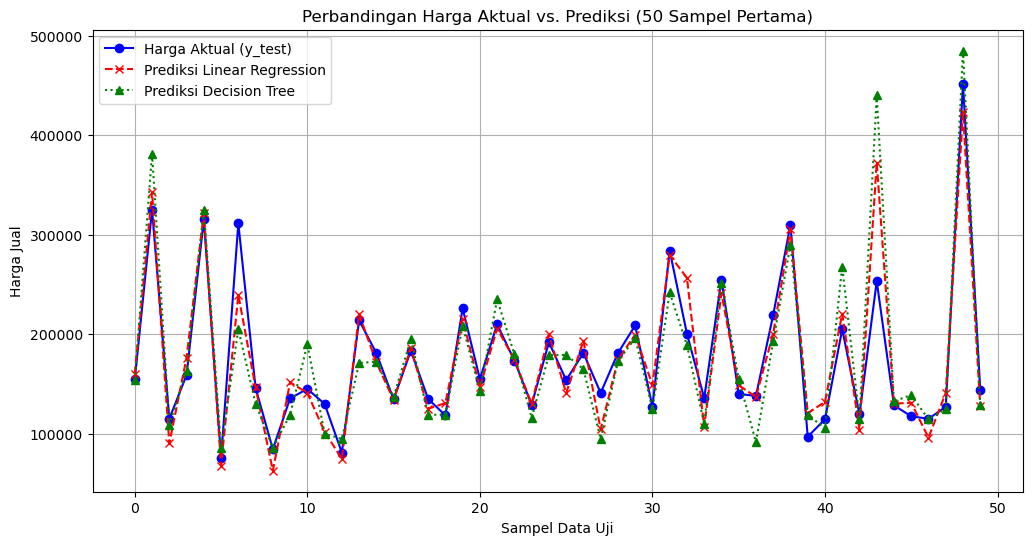

In [5]:
import matplotlib.pyplot as plt

# Ambil 50 data uji pertama untuk visualisasi yang lebih jelas
n_samples = 50
plt.figure(figsize=(12, 6))

# Plot nilai aktual (y_test)
plt.plot(y_test.values[:n_samples], label='Harga Aktual (y_test)', marker='o', linestyle='-', color='blue')

# Plot prediksi Linear Regression
plt.plot(y_pred_lin[:n_samples], label='Prediksi Linear Regression', marker='x', linestyle='--', color='red')

# Plot prediksi Decision Tree Regressor
plt.plot(y_pred_dt[:n_samples], label='Prediksi Decision Tree', marker='^', linestyle=':', color='green')

plt.title('Perbandingan Harga Aktual vs. Prediksi (50 Sampel Pertama)')
plt.xlabel('Sampel Data Uji')
plt.ylabel('Harga Jual')
plt.legend()
plt.grid(True)
plt.show()

# Ambil screenshot hasil visualisasi ini untuk laporan!

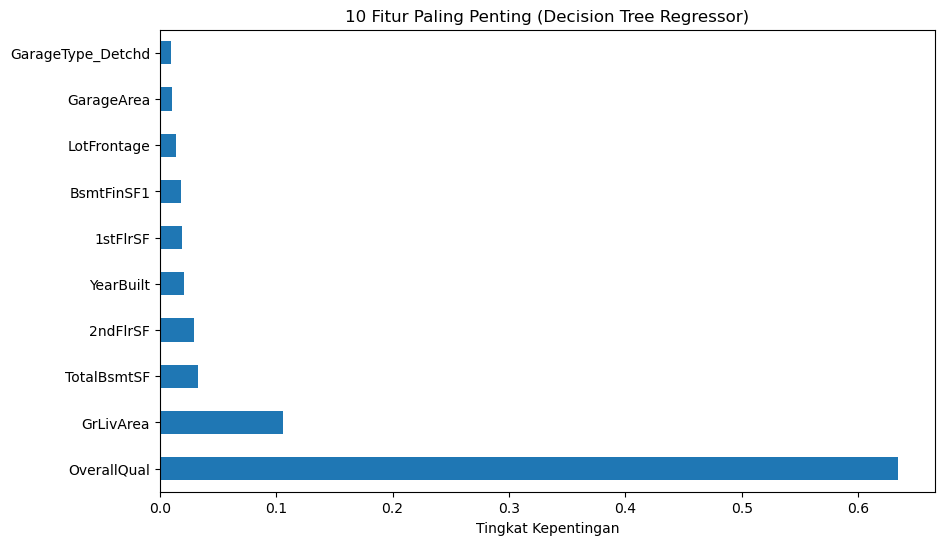

In [7]:
# Analisis Feature Importance dari Decision Tree
feature_importances = pd.Series(dt_reg_model.feature_importances_, index=X_train.columns)
top_10_features = feature_importances.nlargest(10)

plt.figure(figsize=(10, 6))
top_10_features.plot(kind='barh')
plt.title('10 Fitur Paling Penting (Decision Tree Regressor)')
plt.xlabel('Tingkat Kepentingan')
plt.show()

# Ambil screenshot top 10 feature importance untuk laporan!

## 5. Kesimpulan

### Perbandingan Model:
- **Model Baseline (Linear Regression):** RMSE = $83,125.52
- **Model Pembanding (Decision Tree Regressor):** RMSE = $45,162.76

### Model Terbaik dan Alasan:
Model terbaik adalah **Decision Tree Regressor**.

**Alasan Utama:** Nilai RMSE ($45.162,76) yang jauh lebih rendah menunjukkan model ini membuat kesalahan prediksi rata-rata yang lebih kecil dibandingkan Linear Regression. Ini logis karena hubungan antara fitur rumah dan harga jual seringkali **non-linear**, dan Decision Tree mampu memodelkan hubungan non-linear ini dengan lebih baik.

**Wawasan Tambahan:** Berdasarkan Feature Importance, fitur seperti [Sebutkan 2-3 fitur terpenting dari grafik] adalah prediktor harga yang paling dominan.

In [14]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000
